In [2]:
import pandas as pd
from dotenv import load_dotenv
import geopandas as gpd
import matplotlib.pyplot as plt
from operator import itemgetter

load_dotenv()

True

In [3]:
# map_data = gpd.read_file("file.geojson")
zip_map = gpd.read_file("fl_florida_zip_codes_geo.min.json")
zip_codes = pd.read_csv("zip_code_database.csv")
neighborhood_map = gpd.read_file("Miami_Neighborhoods_Shapefile (1).geojson")
csv = pd.read_csv("miami-housing.csv")

In [4]:
zip_codes = zip_codes[["primary_city", "state", "county", "timezone", "area_codes", "country", "zip"]]
zip_codes["county, state"] = zip_codes["county"] + ", " + zip_codes["state"]
zip_map["ZCTA5CE10"] = zip_map["ZCTA5CE10"].astype(int)
zip_map["INTPTLON10"] = zip_map["INTPTLON10"].astype(float)
zip_map["INTPTLAT10"] = zip_map["INTPTLAT10"].astype(float)
zip_map = zip_map.merge(zip_codes, how="left", left_on="ZCTA5CE10", right_on="zip")
zip_map = zip_map.drop(columns=zip_map.columns[zip_map.nunique()==1], index=0)
zip_map = zip_map.dropna(axis=1)
zip_map = zip_map.drop(columns=["ZCTA5CE10"])
zip_map["zip"] = zip_map["zip"].astype(str)


In [5]:
zip_map = zip_map[zip_map["primary_city"]=="Miami"]
neighborhood_map = neighborhood_map.drop(columns=(["Shape__Length", "Shape__Area"]), axis=1)

bounds = neighborhood_map.geometry.apply(lambda x: x.bounds).tolist()
minx_neighborhoods, miny_neighborhoods, maxx_neighborhoods, maxy_neighborhoods = min(bounds, key=itemgetter(0))[0], min(bounds, key=itemgetter(1))[1], max(bounds, key=itemgetter(2))[2], max(bounds, key=itemgetter(3))[3]

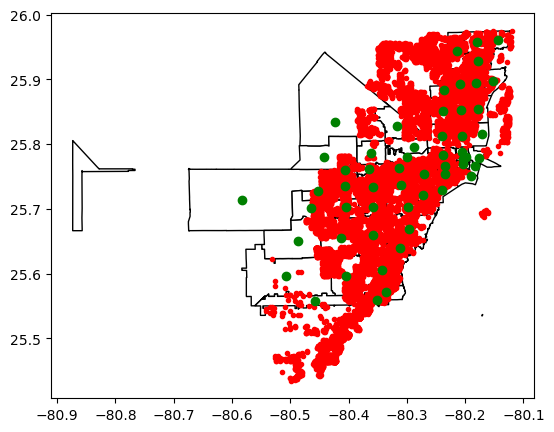

In [6]:
fig, ax = plt.subplots(figsize=(20,5))


zip_map.plot(ax=ax, color="white", edgecolor="black")
plt.scatter(csv["LONGITUDE"], csv["LATITUDE"], marker='.', color="red")
ax.scatter(zip_map["INTPTLON10"], zip_map["INTPTLAT10"], marker='o', color="green")

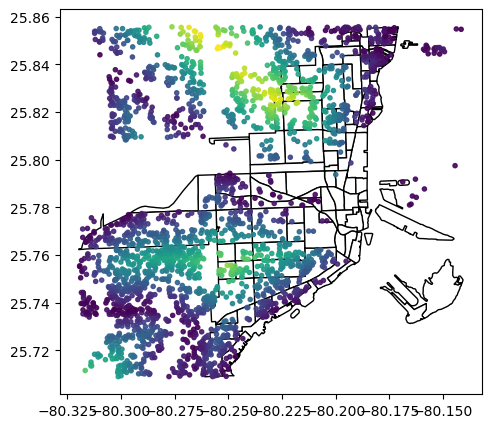

In [18]:


fig, ax = plt.subplots(figsize=(20,5))
# zip_map.plot(ax=ax, )

neighborhood_map.plot(ax=ax, color="white", edgecolor="black")
plt.scatter(csv["LONGITUDE"], csv["LATITUDE"], c= csv["WATER_DIST"], marker='.', alpha=0.9)


<AxesSubplot:>

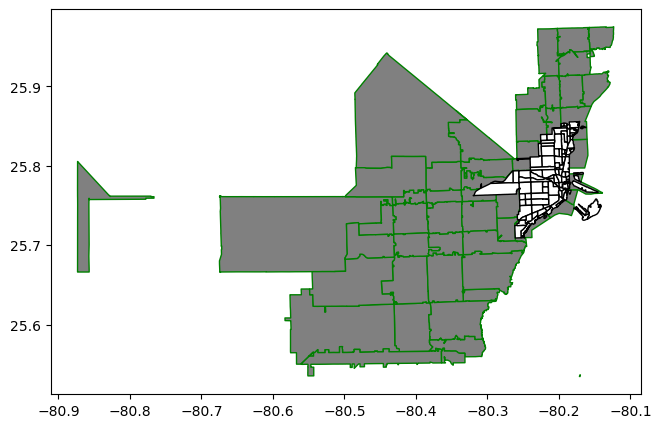

In [23]:
fig, ax = plt.subplots(figsize=(20,5))
zip_map.plot(color="gray", edgecolor="green", ax=ax)
neighborhood_map.plot(color="white", edgecolor="black", ax=ax)


In [9]:
max_latitude = maxy_neighborhoods #25.75
max_longitude = maxx_neighborhoods #-80.1
min_latitude =  miny_neighborhoods #25.62
min_longitude =  minx_neighborhoods #-80.35

csv = csv[(csv["LATITUDE"]<max_latitude)&(csv["LATITUDE"]>min_latitude)&(csv["LONGITUDE"]<max_longitude)&(csv["LONGITUDE"]>min_longitude)]


-80.1407395562956

C:\Users\jgonzalezt\AppData\Local\Temp\ipykernel_19764\3359463069.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_state = csv.groupby("state").mean()


<BarContainer object of 5 artists>

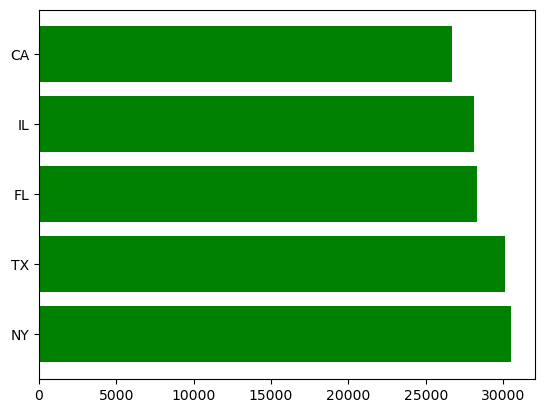

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

csv = pd.read_csv("car_prices.csv")
csv = csv[(csv["year"]>=2015)]
by_state = csv.groupby("state").mean()
by_state["count"] = csv.groupby("state").count()["price"]
by_state = by_state.sort_values(by="price", ascending=False)
plt.barh(
  by_state.index,
  by_state["price"].values,
  color="green",
)

C:\Users\jgonzalezt\AppData\Local\Temp\ipykernel_19764\1033852788.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_brand = csv.groupby("make").mean()


<BarContainer object of 5 artists>

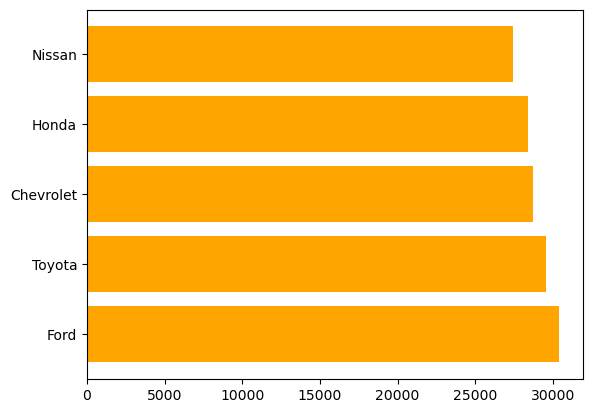

In [21]:
by_brand = csv.groupby("make").mean()
by_brand["count"] = csv.groupby("make").count()["price"]
by_brand = by_brand.sort_values(by="price", ascending=False)
plt.barh(
  by_brand.index,
  by_brand["price"].values,
  color="orange",
)
